# Проект курса ML1 Анализ веб-документов

## 0. Приветствие

Здравствуйте, уважаемые студенты! Рады представить Вам проект по анализу данных. Этот проект поможет Вам на практике попробовать не только те техники, которые мы рассказываем в курсе, но и, возможно, изобрести что-то новое, уникальное. Хотелось, чтобы этот ноутбук не только рассказывал про проект, но и дал Вам некоторые ориентиры, как в принципе стоит подходить к решению незнакомой задачи анализа данных. Надеемся, что наши советы окажутся Вам интересны и помогут скорее стать большим профессионалом. 

Удачи! Будет интересно!

## 1. Обзор проекта

Во множестве прикладных задач возникает необходимость разбить веб-страницы на какие-то определенные группы, где в каждой группе страницы будут очень похожи по смыслу. Например, представим, что Вы владелец сервиса интернет рекламы. Вашим клиентам хочется, чтобы их услуги рекламировались не на каком-то определенном сайте, а на всех сайтах их тематики. То есть Вам нужна какая-то тематическая разметка сайтов в интернете по множеству тематик, и клиент сможет выбрать любую, какая ему больше нравится. Как же такую разметку сделать?

Самый простой способ - разметить людьми множество сайтов в интернете на множество тем, настроить на этой выборке многоклассовый классификатор и сделать предсказанием на всем оставшемся "интернете". Однако, в таком подходе возникает несколько проблем. Во-первых, непонятно откуда брать само множество тем, на которое размечать. Во-вторых, даже если множество тем зафиксировано, не очень понятно, откуда для каждой темы брать примеры, чтобы добавить их в обучающее множество.

В данном задании мы предлагаем Вам попробовать другое решение. Пусть тематику задают сами данные! Разделим наши веб-страницы на множество групп, например, просто по словам в веб-страницах. В такой группе буду как документы об одном и том же, так и "аномалии", которые имеют схожие слова, но не соответствуют документам основной тематики. Например, в такой группе может содержаться подмножество веб-страниц про "ремонт пластиковых окон" и аномалии вроде "пластиковые игрушки", "ремонт квартир" и так далее. Нам останется только выделить подмножество документов одной темы, то есть все документы, которые про "ремонт пластовых окон" и убрать все аномалии. Затем подмножество как-то проименуем, чтобы показать клиенту, но этим Вы уже займетесь, когда будете продавать Вашу систему :)

В задании Вам предлагается работать с 28026 веб-страницами, которые уже скачаны и лежат в архиве content.tar.gz. Эти страницы разбиты по группам, каждая группа около 100 страниц. Каждая группа соответствует какой-то определенной теме, которая Вам неизвестна. Обучающее множество состоит из 129 групп. В обучающих группах ручной разметкой было проставлено, соответствует ли данный документ теме группы (target = 1) или это аномалия (target = 0). Тестовое множество состоит из 180 групп. Вам необходимо проставить для них target. Важно отметить, что обучающие и тестовые группы не пересекаются. Гарантируется, что в каждой группе есть подмножество документов из ее темы.

Далее будем называть веб-страницы, которые соотвествуют теме группы, "настоящими", а которые не соотвествуют - "выбросами". 

Любой аналитик данных первым делом должен посмотреть на сами данные. Возьмем две группы из обучающего множества и посмотрим на две настоящих страницы и на выброс. 

Группа 3. Настоящий объект
![title](images/g3_true_1.png)

Группа 3, Настоящий объект
![image.png](images/g3_true_2.png)

Группа 3. Выброс
![image.png](images/g3_outlier.png)


Кажется, что довольно просто. А посложнее?

Группа 1. Настоящий объект
![image.png](images/g1_true_1.png)

Группа 1. Настоящий объект. 
![image.png](images/g1_true_2.png)

Группа 1. Выброс
![image.png](images/g1_outlier.png)

Задача выглядит сложно, но человек с ней справляется, а значит есть шанс, что машина тоже справится. 

## 2. Обзор данных

Перечислим, какие данные мы дали для решения конкурса. 

1) Контент веб-страниц

Лежит в архиве content.tar.gz. В директориии 28026  веб-страниц, с которыми мы будем работать в конкурсе. Парсить их можно с помощью волшебной библиотеки BeautifulSoup. Рекомендуется почитать в интернете как строится html, чтобы понимать, какие данные можно извлечь из веб-страницы и почитать мануал по этой билиотеке https://www.crummy.com/software/BeautifulSoup/bs4/doc/ Во всех файлах .dat первой строчкой указан урл веб-страницы, на случай, если Вы захотите скачать веб-страницу самостоятельно или использовать урл в качестве признаков. 

In [23]:
# Пример, как можно достать урл и заголовок веб-страницы
from bs4 import BeautifulSoup
import codecs
path = 'content/'
filename = '1.dat'
with codecs.open(path + filename, 'r', 'utf-8') as f:
    url = f.readline().strip()
    title = BeautifulSoup(f, 'lxml').title.text

2) Заголовки веб-страниц
Парсинг веб-страниц занимает довольно много времени (порядка секунды на страницу), поэтому для этой демонстрации и домашних работ мы извлекли из них заголовки и сохранили. Лежат в файле docs_titles.tsv.  Для решения проекта настоятельно рекомендуется не использовать этот файл, а извлечь данные самому, так как страница соотвествует множество полезной информации помимо заголовка. 

In [26]:
import pandas as pd
title_data = pd.read_csv('docs_titles.tsv', sep='\t', encoding='utf-8', lineterminator='\n')
title_data.head()

,doc_id,title
0,15731,ВАЗ 21213 | Замена подшипников ступицы | Нива
1,14829,"Ваз 2107 оптом в Сочи. Сравнить цены, купить п..."
2,15764,Купить ступица Лада калина2. Трансмиссия - пер...
3,17669,Классика 21010 - 21074
4,14852,Ступица Нива — замена подшипника своими руками


Пандас довольно криво работает с текстами, так что я рекомендую считывать этот файл "руками", чтобы корректно все обработать. 

3) Соответствия веб-страниц группам. Группы обучения это train_groups.csv, группы предсказания test_groups.csv

In [2]:
train_groups = pd.read_csv('train_groups.csv')
print (train_groups.shape)
train_groups.head()

(11690, 4)


,pair_id,group_id,doc_id,target
0,1,1,15731,0
1,2,1,14829,0
2,3,1,15764,0
3,4,1,17669,0
4,5,1,14852,0


doc_id - Уникальный идентификатор веб-страницы

group_id - Уникальный идентификатор группы веб-страниц, среди которой нужно найти подмножество одной тематики

pair_id - Уникальный идентификатор пары (group_id, doc_id)

target - Значение, которое нужно предсказать. 1 - страница настоящая, 0 - выброс

In [3]:
test_groups = pd.read_csv('test_groups.csv')
print (test_groups.shape)
test_groups.head()

(16627, 3)


,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


Важно отметить, обучающие и тестовые группы не пересекаются.

То есть нужно предсказать, какие веб-страницы являются настоящими для тестовых групп, когда у Вас нет ни одного настоящего примера из этих групп. 

4) Пример предсказания на тестовом множестве sample_submission.csv

In [4]:
sample_subm = pd.read_csv('sample_submission.csv')
print (sample_subm.shape)
sample_subm.head()

(16627, 2)


,pair_id,target
0,11691,0
1,11692,1
2,11693,0
3,11694,1
4,11695,0


## 3. Пример предсказания

Как же такую задачу решать? В  анализе данных нет правильного решения. Здесь никому не важен алгоритм которым Вы решали, данные которые Вы использовали. Важен финальный результат.
Нам понравится любое решение, которое будет хорошо решать задачу :) Далее мы будем рассказывать, как нам кажется  стоит решать эту задачу, но Вы вольны делать ее, как Вам больше нравится. 

При решении любой задачи анализа данныъ нужно определить, что является объектом, то есть для какой сущности мы хотим делать предсказания. В этой задаче объектом является пара (группа, веб-страница). Не имеет большого смысла говорить просто об объекте, без какой-либо привязки  к группе. Поэтому большинство признаков должно одновременно описывать отношение объекта с группой. 


С этой точки зрения на наша задача превращается во что-то подобное:

![title](images/anomaly_example.png)

То есть в группе есть множество страниц, тесно друг с другом связанных, а есть страницы, которые не связаны  или слабо связаны с другими страницами в группе. Очевидно, первые -- настоящие, а вторые -- выбросы. Как задать величину "связи"?  Самый простой и очевидный способ -- число общих слов в заголовках!

Сделаем датасет с признаками вида "макс число общих слов с другими объектами из группы", "предмакс число общих слов с другими объектами из группы" ...

In [28]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


Перегоняем пандас в словарь, потому что я не люблю пандас :(

In [10]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

Возьмем любую группу и посмотрим сколько общих слов с другими страницами из группы у настоящей веб-страницы и у выброса.  Номера объектов мы подсмотрели заранее. 

In [11]:
check_group_id = 3
outlier_doc_num = 0
true_doc_num = 2
outlier_doc_words = set(traingroups_titledata[check_group_id][outlier_doc_num][1].split())
true_doc_words = set(traingroups_titledata[check_group_id][true_doc_num][1].split())
outlier_doc_intersect = []
true_doc_intersect = []
for i in range(len(traingroups_titledata[check_group_id])):
    doc_words = set(traingroups_titledata[check_group_id][i][1].split())
    if i != outlier_doc_num:
        outlier_doc_intersect.append(len(outlier_doc_words.intersection(doc_words)))
    if i != true_doc_num:
        true_doc_intersect.append(len(true_doc_words.intersection(doc_words)))
        
print (max(outlier_doc_intersect))
print (max(true_doc_intersect))

1
5


У выброса максимум одно общее слово с другой веб страницей! Отрисуем теперь гистограмму для числа общих слов. 

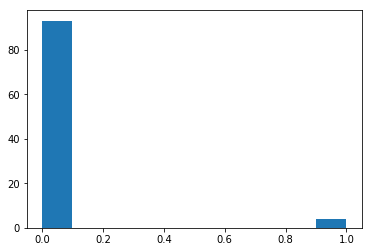

In [12]:
from matplotlib import pyplot as plt
plt.hist(outlier_doc_intersect)
plt.show()

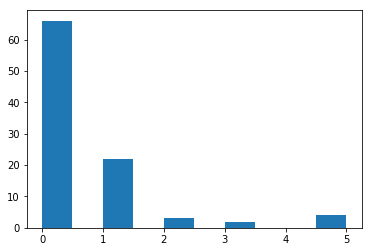

In [13]:
plt.hist(true_doc_intersect)
plt.show()

Разница в гистрограмме огромная! Значит метод должен сработать.

Теперь посчитаем общие слова для всех групп и всех веб-страниц. Как мы видели ранее, у аномалий максимум общих слов значительно меньше. Но чтобы подстраховаться от пары выбросов с одинаковыми словами в заголовке, возьмем не один максимум, а все топ-n значений. Например, как признаки для веб-страницы, возьмем значения топ-15  пересечений с другими страницами из группы. 

In [14]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Отрисуем классы в пространстве первых двух признаков. 

Видно, что выбросы в среднем  расположены слева снизу, но есть и несколько исключений из этого правила.

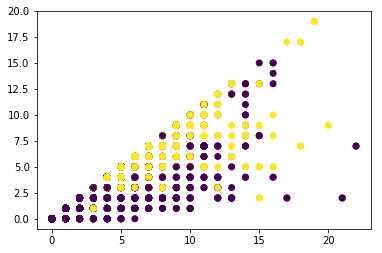

In [15]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

$\textbf{Задание:}$

1) Разбейте выборку на обучение и валидацию (как это сделать правильно? не забудьте, как разбиты группы в обучении и тесте, валидация должна повторять эту логику)

2) Обучите метод ближайшего соседа, проверьте  качество на валидации. Не забудьте использовать нормализацию признаков!

3) Не забывайте, что метод ближайшего соседа не оптимизирует F1. Как по выходу метода ближайшего соседа сделать оптимальное предсказание с точки зрения метрики F1?

In [25]:
from sklearn.metrics import f1_score

Если успешно справились, сделайте предсказание на тестовом множестве и залейте Ваше решение на платформу kaggle.  Посмотрите результат, попробуйте его улучшить. Потом еще раз улучшить :)

Вы готовы заниматься анализом данных!

In [17]:
test_data = pd.read_csv('test_groups.csv')
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


Мы с Вами рассмотрели один из вариантов построения признаков в задаче. Однако, это не значит, что другие варианты построения признаков не имеют права на жизнь. Некоторые веб-страницы вообще нельзя присоединить к тематике (спам, например) или, возможно, некоторые группы задают широкую тему (холодильники), а некоторые более узкую (холодильники сделанные в  Советском Союзе в 80х годах). Таким образом, признаки, которыми мы будем описывать пару (группа, веб-страница) можно разделить на:

1) Зависят от пары (группа, веб-страница) самые важные признаки

2) Зависят от группы

3) Зависят от веб-страницы

Мы в рассмотрели только самую важную (на наш взгляд) первую группу.

## 4. Правила конкурса

Конкурс проходит на платформе kaggle по адресу, который есть в чате и на портале. 



Основные правила:
1. Соревнование длится до конца курса
2. Баллы будут проставлены в зависимости от итоговой позици команды в рейтинге
3. При непродолении бейзлайна проект для команды не считается засчитанным
4. Команда может быть не более 4 человек
5. Весь код должен быть закомичен на гитхаб для проверки

Чего делать нельзя (карается незащитой проекта):
1. Обмениваться кодом между командами вне общего слака
2. Использовать ручную разметку

Чем можно пользоваться:
любыми алгоритмами, любыми дополнительными данными. 

Любые вопросы задавать в слаке @vikulin_seva

## 5. Советы по решению

Перечислим здесь идеи, которые пришли нам самим в голову. Это только наше мнение, ему следовать не обязательно :)

1. Использовать нормализацию текста при подсчете текстовой похожести (см. лекцию 11 или интернет, библиотеку nltk, pymorphy)
2. Очевидно, просто число общих слов не идеальная метрика похожести. Как минимум, не учитывает длину, не учитывает, что бывают популярные слова (в, и, на), которые везде встречаются. 
3. Брать другую информацию из html страницы (url, body, meta...)
4. Попробовать лучше понять структуру в рамках одной группы с помощью методов кластеризации и добавить ее выход в признаки (см лекцию 8 или интернет)
5. Посмотреть в сторону методов детекции аномалий, которые явным образом в курсе не рассматриваются (см интернет, например, вот https://dyakonov.org/2017/04/19/поиск-аномалий-anomaly-detection/) и их выход добавлять в признаки
6. Попробовать разные алгоритмы машинного обучения

Интутивно кажется, что в этом конкурсе  важнее построение признаков, чем сам алгоритм, но, возможно, интуиция нас подводит.

Cоветы не только на этот конкурс: 
1. Смотреть на данные, только так можно придумать хорошее решение
2. Обычно, самые красивые решения являются самыми простыми (см http://alexanderdyakonov.narod.ru/intro2datamining.pdf http://alexanderdyakonov.narod.ru/lpotdyakonov.pdf). Постарайтесь их найти :)
3. Не доверять полностью публичному значению качества на kaggle, ВСЕГДА использовать валидацию
4. Пробовать усреднять предсказания разных моделей, это может работать лучше, чем каждая по отдельности. 


Удачи!